# Cars Sales Prediction Using Deep Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn as sk
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Data Analysing**

In [3]:
#Data Audit
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [4]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [5]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [6]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [7]:
cars = pd.read_excel('car_sales.xlsx')

In [83]:
cars

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02 00:00:00,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-03-06 00:00:00,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-04-01 00:00:00,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-10-03 00:00:00,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-08-10 00:00:00,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Mercedes-B,SLK,7.998,NaN,Passenger,38.90,2.3,190.0,94.5,67.5,157.9,3.055,15.9,26.0,1/16/2011,82.807362
97,Mercedes-B,SLK230,1.526,NaN,Passenger,41.00,2.3,185.0,94.5,67.5,157.3,2.975,14.0,27.0,2011-06-08 00:00:00,81.848969
98,Mercedes-B,CLK Coupe,11.592,NaN,Passenger,41.60,3.2,215.0,105.9,67.8,180.3,3.213,16.4,26.0,2011-08-07 00:00:00,92.925792
99,Mercedes-B,CL500,0.954,NaN,Passenger,85.50,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,2011-11-04 00:00:00,141.100985


In [9]:
cars.describe(include='all')

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,101,101,101.000000,85.000000,101,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,101,99.000000
unique,19,101,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN
top,Ford,Integra,NaN,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/23/2012,NaN
freq,11,1,NaN,NaN,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
mean,NaN,NaN,59.405574,18.221059,NaN,28.854737,3.278000,195.440000,108.805000,71.801000,189.767000,3.487788,18.591000,23.303030,NaN,81.005865
std,NaN,NaN,77.964018,10.730210,NaN,15.066433,1.127756,60.300312,8.093549,3.596786,14.148313,0.660371,4.130818,4.509524,NaN,26.659060
min,NaN,NaN,0.110000,5.160000,NaN,9.235000,1.000000,55.000000,93.100000,62.600000,149.400000,1.895000,10.300000,15.000000,NaN,23.276272
25%,NaN,NaN,14.785000,11.525000,NaN,18.962500,2.500000,153.750000,104.000000,69.175000,180.000000,3.056500,16.000000,21.000000,NaN,62.472851
50%,NaN,NaN,29.450000,14.795000,NaN,24.997000,3.100000,194.000000,108.000000,71.450000,190.550000,3.470000,18.000000,23.000000,NaN,80.657696
75%,NaN,NaN,73.203000,20.525000,NaN,35.717500,4.000000,225.000000,113.000000,74.400000,199.775000,3.876000,20.000000,25.500000,NaN,92.645507


In [10]:
cars_conti_vars = cars.loc[:, (cars.dtypes == 'float64') | (cars.dtypes == 'int64')]
cars_cat_vars = cars.loc[:, (cars.dtypes == 'object')]
#cars_cat_vars

In [11]:
cars_conti_vars.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,101.0,0.0,5999.96,59.41,29.45,77.96,6078.39,0.11,0.92,3.31,6.54,14.78,29.45,73.20,155.79,220.65,276.75,540.56
__year_resale_value,85.0,16.0,1548.79,18.22,14.80,10.73,115.14,5.16,5.75,7.83,8.86,11.52,14.80,20.52,31.14,40.10,58.49,58.60
Price_in_thousands,99.0,2.0,2856.62,28.85,25.00,15.07,227.00,9.24,9.69,12.29,13.98,18.96,25.00,35.72,45.81,60.29,82.66,85.50
Engine_size,100.0,1.0,327.80,3.28,3.10,1.13,1.27,1.00,1.50,1.80,2.00,2.50,3.10,4.00,4.60,5.20,5.72,8.00
Horsepower,100.0,1.0,19544.00,195.44,194.00,60.30,3636.13,55.00,91.63,112.85,120.00,153.75,194.00,225.00,275.00,300.10,346.05,450.00
Wheelbase,100.0,1.0,10880.50,108.80,108.00,8.09,65.51,93.10,93.40,96.20,98.94,104.00,108.00,113.00,117.52,120.74,138.50,138.70
Width,100.0,1.0,7180.10,71.80,71.45,3.60,12.94,62.60,65.67,66.70,67.28,69.18,71.45,74.40,76.82,78.70,79.31,79.90
Length,100.0,1.0,18976.70,189.77,190.55,14.15,200.17,149.40,151.97,167.46,174.39,180.00,190.55,199.77,207.25,212.00,224.20,224.50
Curb_weight,99.0,2.0,345.29,3.49,3.47,0.66,0.44,1.90,2.23,2.46,2.67,3.06,3.47,3.88,4.25,4.47,5.40,5.57
Fuel_capacity,100.0,1.0,1859.10,18.59,18.00,4.13,17.06,10.30,11.88,13.18,14.27,16.00,18.00,20.00,24.37,26.00,32.00,32.00


In [12]:
cars_cat_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
Manufacturer,101,0,Ford,11,10.89
Model,101,0,Integra,1,0.99
Vehicle_type,101,0,Passenger,74,73.27
Latest_Launch,101,0,2/23/2012,2,1.98


**Outlier Treatment**

In [13]:
cars_conti_vars = cars_conti_vars.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))
cars_conti_vars.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,101.0,0.0,5736.95,56.80,29.45,65.02,4227.86,0.92,0.92,3.31,6.54,14.78,29.45,73.20,155.79,220.65,276.75,276.75
__year_resale_value,85.0,16.0,1549.27,18.23,14.80,10.72,114.85,5.75,5.84,7.83,8.86,11.52,14.80,20.52,31.14,40.10,58.47,58.49
Price_in_thousands,99.0,2.0,2854.23,28.83,25.00,14.95,223.61,9.69,9.70,12.29,13.98,18.96,25.00,35.72,45.81,60.29,82.60,82.66
Engine_size,100.0,1.0,326.02,3.26,3.10,1.04,1.09,1.50,1.50,1.80,2.00,2.50,3.10,4.00,4.60,5.20,5.70,5.72
Horsepower,100.0,1.0,19476.68,194.77,194.00,55.86,3119.87,91.63,92.00,112.85,120.00,153.75,194.00,225.00,275.00,300.10,345.01,346.05
Wheelbase,100.0,1.0,10880.60,108.81,108.00,8.08,65.29,93.40,93.40,96.20,98.94,104.00,108.00,113.00,117.52,120.74,138.50,138.50
Width,100.0,1.0,7182.58,71.83,71.45,3.52,12.37,65.67,65.70,66.70,67.28,69.18,71.45,74.40,76.82,78.70,79.30,79.31
Length,100.0,1.0,18978.98,189.79,190.55,14.07,197.93,151.97,152.00,167.46,174.39,180.00,190.55,199.77,207.25,212.00,224.20,224.20
Curb_weight,99.0,2.0,345.46,3.49,3.47,0.65,0.42,2.23,2.24,2.46,2.67,3.06,3.47,3.88,4.25,4.47,5.40,5.40
Fuel_capacity,100.0,1.0,1860.68,18.61,18.00,4.10,16.82,11.88,11.90,13.18,14.27,16.00,18.00,20.00,24.37,26.00,32.00,32.00


**Missing Value Treatment**

In [14]:
cars_conti_vars = cars_conti_vars.apply(missing_imputation)
cars_cat_vars = cars_cat_vars.apply(missing_imputation)
cars_conti_vars.apply(continuous_var_summary).T.round(1)

C:\Users\HTC\anaconda3\lib\site-packages\pandas\core\algorithms.py:968: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'datetime.datetime'
  warn(f"Unable to sort modes: {err}")


,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,101.0,0.0,5737.0,56.8,29.4,65.0,4227.9,0.9,0.9,3.3,6.5,14.8,29.4,73.2,155.8,220.6,276.7,276.7
__year_resale_value,101.0,0.0,1840.9,18.2,17.3,9.8,96.5,5.7,5.9,7.8,9.1,12.5,17.3,19.7,28.7,39.0,58.5,58.5
Price_in_thousands,101.0,0.0,2911.9,28.8,25.3,14.8,219.1,9.7,9.7,12.3,14.0,19.0,25.3,35.3,45.7,60.1,82.6,82.7
Engine_size,101.0,0.0,329.3,3.3,3.1,1.0,1.1,1.5,1.5,1.8,2.0,2.5,3.1,4.0,4.6,5.2,5.7,5.7
Horsepower,101.0,0.0,19671.4,194.8,194.8,55.6,3088.7,91.6,92.0,113.0,120.0,154.0,194.8,225.0,275.0,300.0,345.0,346.1
Wheelbase,101.0,0.0,10989.4,108.8,108.0,8.0,64.6,93.4,93.4,96.2,99.0,104.1,108.0,113.0,117.5,120.7,138.5,138.5
Width,101.0,0.0,7254.4,71.8,71.5,3.5,12.2,65.7,65.7,66.7,67.3,69.2,71.5,74.4,76.8,78.7,79.3,79.3
Length,101.0,0.0,19168.8,189.8,190.4,14.0,196.0,152.0,152.0,167.5,174.4,180.1,190.4,199.7,207.2,212.0,224.2,224.2
Curb_weight,101.0,0.0,352.4,3.5,3.5,0.6,0.4,2.2,2.2,2.5,2.7,3.1,3.5,3.9,4.2,4.5,5.4,5.4
Fuel_capacity,101.0,0.0,1879.3,18.6,18.0,4.1,16.7,11.9,11.9,13.2,14.3,16.0,18.0,20.0,24.3,26.0,32.0,32.0


**Dealing Categorical Values**

In [15]:
cars_cat_vars.Manufacturer.value_counts()

Ford          11
Dodge         11
Mercedes-B     9
Chevrolet      9
Mitsubishi     7
Chrysler       7
Mercury        6
Lexus          6
Honda          5
Cadillac       5
Buick          4
Acura          4
Audi           3
Hyundai        3
Jeep           3
Lincoln        3
BMW            3
Infiniti       1
Jaguar         1
Name: Manufacturer, dtype: int64

In [16]:
cars_cat_vars = cars[['Manufacturer', 'Vehicle_type']]

for c_feature in ['Manufacturer', 'Vehicle_type']:
    cars_cat_vars[c_feature] = cars_cat_vars[c_feature].astype('category')
    cars_cat_vars = create_dummies(cars_cat_vars, c_feature)

C:\Users\HTC\AppData\Local\Temp\ipykernel_12024\711182808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cat_vars[c_feature] = cars_cat_vars[c_feature].astype('category')


**Final Data**

In [17]:
cars_new = pd.concat([cars_conti_vars, cars_cat_vars], axis = 1)
cars_new.head(3)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Hyundai,Manufacturer_Infiniti,Manufacturer_Jaguar,Manufacturer_Jeep,Manufacturer_Lexus,Manufacturer_Lincoln,Manufacturer_Mercedes-B,Manufacturer_Mercury,Manufacturer_Mitsubishi,Vehicle_type_Passenger
0,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,28.830623,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1


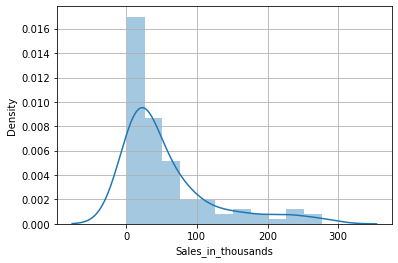

In [18]:
# Distribution of variables
sns.distplot(cars_new.Sales_in_thousands)
plt.show()

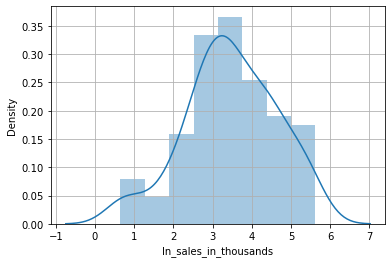

In [19]:
# apply log transformation: log is rescalling the data and making the distribution normal
cars_new['ln_sales_in_thousands'] = np.log(cars_new['Sales_in_thousands']+1)

# Distribution of variables
sns.distplot(cars_new.ln_sales_in_thousands)
plt.show()


In [20]:
cars_new.columns

Index(['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Vehicle_type_Passenger', 'ln_sales_in_thousands'],
      dtype='object')

In [21]:
cars_new.drop(['Power_perf_factor','__year_resale_value'], axis = 1, inplace = True)

In [22]:
# dropping the variables based low correlation with Y
#cars_new.drop(['four_year_resale_value', 'Power_perf_factor'], axis = 1, inplace = True)
cars_new.head(3)

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Manufacturer_Infiniti,Manufacturer_Jaguar,Manufacturer_Jeep,Manufacturer_Lexus,Manufacturer_Lincoln,Manufacturer_Mercedes-B,Manufacturer_Mercury,Manufacturer_Mitsubishi,Vehicle_type_Passenger,ln_sales_in_thousands
0,16.919,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,...,0,0,0,0,0,0,0,0,1,2.885862
1,39.384,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,...,0,0,0,0,0,0,0,0,1,3.698434
2,14.114,28.830623,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,...,0,0,0,0,0,0,0,0,1,2.715621


In [23]:
cars_new.shape

(101, 30)

In [25]:
# splitting the data: separate out the feature/input/independant columns and dependant variable
#cars_new.columns
feature_columns = cars_new.columns.difference(['ln_sales_in_thousands', 'Sales_in_thousands'])
feature_columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi', 'Price_in_thousands',
       'Vehicle_type_Passenger', 'Wheelbase', 'Width'],
      dtype='object')

In [27]:
from sklearn.preprocessing import StandardScaler

# Separate Target Variable and Predictor Variables
TargetVariable=['ln_sales_in_thousands']
 
X=cars_new.drop(columns=['ln_sales_in_thousands','Sales_in_thousands'])
y=cars_new[TargetVariable].values
 
### Sandardization of data ###
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(75, 28)
(75, 1)
(26, 28)
(26, 1)


In [28]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)


LinearRegression()

In [31]:
y_pred =  LR.predict(X_test)


In [32]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)

Mean Absolute Error: 0.4853748107890827
Mean Squared Error: 0.35627261153932493
R2 Score: 0.5644170893546245


In [76]:
predictors=pd.DataFrame(data=cars_new,columns=cars_new.drop(columns=['ln_sales_in_thousands','Sales_in_thousands']).columns)

In [137]:
Predictions=TargetVarScalerFit.inverse_transform(y_pred)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
LRTest_Data=PredictorScalerFit.inverse_transform(X_test)
 
LRTestingData=pd.DataFrame(data=LRTest_Data, columns=predictors.columns)
LRTestingData['Value']=y_test_orig
LRTestingData['PredictedValue']=Predictions
LRTestingData.head(10)

,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Manufacturer_Audi,...,Manufacturer_Jaguar,Manufacturer_Jeep,Manufacturer_Lexus,Manufacturer_Lincoln,Manufacturer_Mercedes-B,Manufacturer_Mercury,Manufacturer_Mitsubishi,Vehicle_type_Passenger,Value,PredictedValue
0,31.807,3.500,200.00,107.3,69.9,186.6,4.520,24.3,18.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,1.0,0.0,2.512603,2.946613
1,12.050,2.500,119.00,117.5,69.4,200.7,3.086,20.0,23.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,0.0,5.401100,5.188634
2,42.800,3.000,240.00,114.5,71.6,191.3,3.650,18.4,21.0,-3.469447e-18,...,1.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,1.0,2.801358,2.559872
3,14.460,2.500,120.00,93.4,66.7,152.0,3.045,19.0,17.0,-3.469447e-18,...,0.0,1.000000e+00,0.0,-3.469447e-18,0.0,0.0,0.0,0.0,4.035249,4.212207
4,19.565,2.400,150.00,113.3,76.8,186.3,3.533,20.0,24.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,0.0,5.208114,4.386837
5,69.725,5.723,346.05,96.2,75.7,176.7,3.375,19.0,16.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,1.0,0.650240,0.623011
6,19.390,3.400,180.00,110.5,72.7,197.9,3.340,17.0,27.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,1.0,3.774897,4.508425
7,26.310,5.200,230.00,115.7,71.7,193.5,4.394,25.0,17.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,0.0,4.628134,4.153414
8,21.975,3.100,175.00,109.0,72.7,194.6,3.368,17.5,25.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,1.0,4.527868,4.110852
9,21.500,1.800,140.00,101.2,67.3,172.4,2.639,13.2,28.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,1.0,2.885862,3.081571


In [138]:
LRresult=pd.DataFrame({'Actual':LRTestingData['Value'],'Predicted':LRTestingData['PredictedValue']})
LRresult['Actual']=np.exp(LRresult['Actual'])
LRresult['Predicted']=np.exp(LRresult['Predicted'])
LRresult=LRresult.astype({'Actual':float,'Predicted':float})

LRresult.head(10)

,Actual,Predicted
0,12.337,19.041343
1,221.650,179.223538
2,16.467,12.934160
3,56.557,67.505364
4,182.749,80.385740
5,1.916,1.864534
6,43.593,90.778722
7,102.323,63.650906
8,92.561,60.998640
9,17.919,21.792608


In [75]:
##applying deep learning
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer 
model.add(Dense(units=5, input_dim=28, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size =10, epochs = 100, verbose=1)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 1.0495
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 1.0420
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 1.0354
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 1.0270
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0171
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 1.0047
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9895
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9736
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9532
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9326
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9037
Epoch 12/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8808
Epoch 13/100
8/8 [==============================] - 0s 4ms/st

In [77]:
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=predictors.columns)
TestingData['Value']=y_test_orig
TestingData['PredictedValue']=Predictions
TestingData.head(10)

1/1 [==============================] - 0s 80ms/step


,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Manufacturer_Audi,...,Manufacturer_Jaguar,Manufacturer_Jeep,Manufacturer_Lexus,Manufacturer_Lincoln,Manufacturer_Mercedes-B,Manufacturer_Mercury,Manufacturer_Mitsubishi,Vehicle_type_Passenger,Value,PredictedValue
0,31.807,3.500,200.00,107.3,69.9,186.6,4.520,24.3,18.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,1.0,0.0,2.512603,2.485152
1,12.050,2.500,119.00,117.5,69.4,200.7,3.086,20.0,23.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,0.0,5.401100,5.588654
2,42.800,3.000,240.00,114.5,71.6,191.3,3.650,18.4,21.0,-3.469447e-18,...,1.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,1.0,2.801358,3.511015
3,14.460,2.500,120.00,93.4,66.7,152.0,3.045,19.0,17.0,-3.469447e-18,...,0.0,1.000000e+00,0.0,-3.469447e-18,0.0,0.0,0.0,0.0,4.035249,4.399943
4,19.565,2.400,150.00,113.3,76.8,186.3,3.533,20.0,24.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,0.0,5.208114,4.670034
5,69.725,5.723,346.05,96.2,75.7,176.7,3.375,19.0,16.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,1.0,0.650240,0.510428
6,19.390,3.400,180.00,110.5,72.7,197.9,3.340,17.0,27.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,1.0,3.774897,4.275013
7,26.310,5.200,230.00,115.7,71.7,193.5,4.394,25.0,17.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,0.0,4.628134,3.059078
8,21.975,3.100,175.00,109.0,72.7,194.6,3.368,17.5,25.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,1.0,4.527868,4.292882
9,21.500,1.800,140.00,101.2,67.3,172.4,2.639,13.2,28.0,-3.469447e-18,...,0.0,-3.469447e-18,0.0,-3.469447e-18,0.0,0.0,0.0,1.0,2.885862,3.606475


In [79]:
#from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print('Accuracy of the model is',r2_score(y_test_orig,Predictions))
print('MSE',mean_squared_error(y_test_orig,Predictions))
print('MAE',mean_absolute_error(y_test_orig,Predictions))

Accuracy of the model is 0.5766883949881229
MSE 0.4693991325798045
MAE 0.5605976267261116


In [102]:
fresult=pd.DataFrame({'Actual':TestingData['Value'],'Predicted':TestingData['PredictedValue']})
fresult['Actual']=np.exp(fresult['Actual'])
fresult['Predicted']=np.exp(fresult['Predicted'])
fresult=fresult.astype({'Actual':float,'Predicted':float})

fresult.head(10)

,Actual,Predicted
0,12.337,12.002950
1,221.650,267.375519
2,16.467,33.482250
3,56.557,81.446251
4,182.749,106.701416
5,1.916,1.666004
6,43.593,71.881073
7,102.323,21.307913
8,92.561,73.177055
9,17.919,36.835983


In [149]:
#both have same actual values
Gresult=pd.DataFrame({'Actual(All in thousands)':LRresult.Actual,'Linear Regression.Predicted':LRresult.Predicted,
                      'Neural Network.Predicted':fresult.Predicted})
Gresult.head(10)

,Actual(All in thousands),Linear Regression.Predicted,Neural Network.Predicted
0,12.337,19.041343,12.002950
1,221.650,179.223538,267.375519
2,16.467,12.934160,33.482250
3,56.557,67.505364,81.446251
4,182.749,80.385740,106.701416
5,1.916,1.864534,1.666004
6,43.593,90.778722,71.881073
7,102.323,63.650906,21.307913
8,92.561,60.998640,73.177055
9,17.919,21.792608,36.835983


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

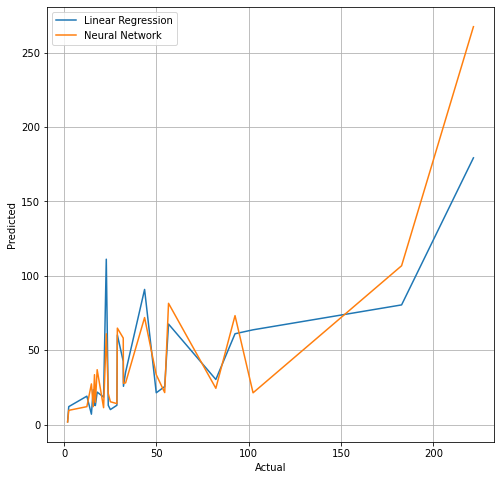

In [148]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.rcParams['axes.grid'] = True
sns.lineplot(x=LRresult['Actual'],y=LRresult['Predicted'],label='Linear Regression')
sns.lineplot(x=fresult['Actual'],y=fresult['Predicted'],label='Neural Network')

